In [1]:
import cleanvision as cv
import pathlib as pb
import sys
import os
os.chdir('..')

In [2]:
if (p := pb.Path(os.getcwd())) not in sys.path:
    sys.path.append(str(p))

from gic import *
from gic.data.dataset import GICDataset

Seed set to 10056


In [3]:
from gic.learning.focalnet.wrappers import FocalNetClassifier

In [4]:
model = FocalNetClassifier(       lr=4e-4,
        chan=128,
        groups=8,
        repeat=3,
        layers=2,
        dense=224,
        augment_n=1,
        augment=True,
        dropout=0.15,
        augment_m=11,
        reduce="max",
        weight_decay=8e-3,
        norm_layer='batch',
        dropout_dense=0.30,
        conv_order="2 1 0",
        drop_type='spatial',
        activ_fn='LeakyReLU',
        num_classes=GICDataset.num_classes)
model

FocalNetClassifier(
  (_loss_fn): CrossEntropyLoss()
  (focalnet): FocalNetModule(
    (input_layer): Sequential(
      (0): Conv2d(3, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (cnn): Sequential(
      (0): Sequential(
        (0): ResidualModule(
          (layer): RepeatModule(
            (layers): Sequential(
              (0): Sequential(
                (0): LeakyReLU(negative_slope=0.01)
                (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (3): Dropout2d(p=0.15, inplace=False)
              )
              (1): Sequential(
                (0): LeakyReLU(negative_slope=0.01)
                (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [5]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

3849220

Reading images from /home/invokariman/Projects/git/ub-g21-deeplearning/projects/gic/data/valid_images
Sample images from the dataset


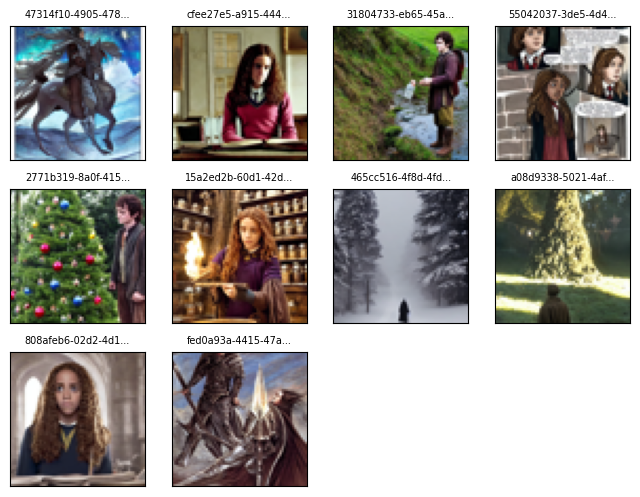

In [48]:
lab = cv.Imagelab(data_path=str(DATA_PATH / 'valid_images'))
lab.visualize(num_images=10)

In [49]:
lab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 2000/2000 [00:00<00:00, 3813.19it/s]

Issue checks completed. 15 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | dark             |            5 |
|  1 | exact_duplicates |            5 |
|  2 | low_information  |            5 |
|  3 | blurry           |            0 |
|  4 | grayscale        |            0 |
|  5 | light            |            0 |
|  6 | odd_aspect_ratio |            0 |
|  7 | odd_size         |            0 |
|  8 | near_duplicates  |            0 | 

----------------------- dark images ------------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



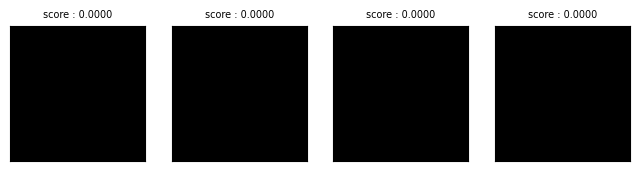

----------------- exact_duplicates images ------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:

Set: 0


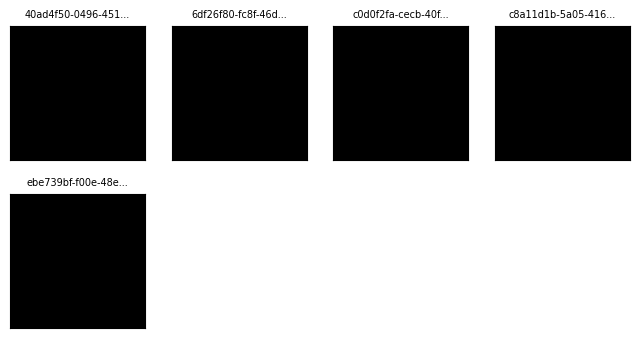

------------------ low_information images ------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



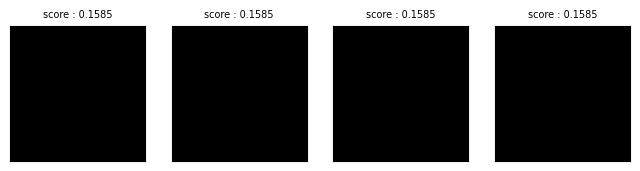

In [50]:
lab.report()

In [51]:
import pandas as ps

csv_file = ps.read_csv(DATA_PATH / 'valid.csv')
issues = lab.issues[lab.issues['is_low_information_issue'] == True].index.map(lambda x: pb.Path(x).name)

In [53]:
csv_file.drop(csv_file[csv_file['Image'].isin(issues)].index).reset_index(drop=True).to_csv(DATA_PATH / 'valid.csv')

In [56]:
csv_file

,Unnamed: 0,Image,Class
0,0,e91a8fbc-d3ba-4b39-8c2f-04c14de78e5e.png,32
1,1,7c40819b-c3ce-4a91-9e98-c3df11b63623.png,85
2,2,d54269d7-fe86-4112-9c0f-99cc6ab8d9c0.png,41
3,3,cbf9ac9e-0859-4b54-ae65-347587b45deb.png,97
4,4,6aafce3f-9002-44e0-9a99-ffe9b49c9bac.png,62
...,...,...,...
1990,1990,b8327491-f96b-407d-b95d-eaf735ae1c82.png,86
1991,1991,85c9d248-45c6-468b-9510-29fc6a9d582a.png,36
1992,1992,da9d6ae7-4731-4f4f-9b52-a95220a0d94a.png,47
1993,1993,d9544669-71e0-464c-9731-ed9efc3fe40f.png,39


In [57]:
li = lab.issues[lab.issues['is_low_information_issue'] == True].index.tolist()
for l in li:
    os.remove(l)

: 